# Titanic 

- 데이터 셋 : Titanic.CSV(변수:12, 자료수:891개)
- 종속변수 : Survived(생존여부) - Survival(0=no, 1=yes)

**📌 분석목표 : 생존율에 영향을 미치는 영향인자 도출**
- 가설 1 : 선실등급은 생존에 영향을 주는 설명변수일 것이다.
- 가설 2 : 성별은 생존에 영향을 주는 설명변수일 것이다.
- 가설 3 : 나이는 생존에 영향을 주는 설명변수일 것이다.
- 가설 4 : 승선장소는 생존에 영향을 주는 설명변수일 것이다.
- 가설 5 : 티켓 가격은 생존에 영향을 주는 설명변수일 것이다.
- 가설 6 : 합께탑승수(형제,배우자)는 생존에 영향을 주는 설명변수일 것이다.
- 가설 7 : 함께탑승수(자녀,부모)는 생존에 영향을 주는 설명변수일 것이다.

## 0. 패키지 불러오기

In [1]:
# 데이터 구성 패키지
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# scaling class
from sklearn.preprocessing import scale, minmax_scale, robust_scale

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

# matplotlib 패키지 한글 깨침 처리
matplotlib.rc('font', family = 'AppleGothic')
plt.rc('font', family = 'AppleGothic')

import warnings
warnings.filterwarnings(action='ignore')

## 1. 데이터 속성 및 기술 통계량 확인

In [2]:
df_raw = pd.read_csv("./data2/titanic.csv", engine="python")
df_raw.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 데이터셋의 컬럼 종류와 속성 및 각 컬럼의 개수 확인
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**📄 각 컬럼들의 정보**
* survival - 생존유무, target 값. (0 = 사망, 1 = 생존)
* pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
* sex - 성별
* Age - 나이(세)
* sibsp - 함께 탑승한 형제자매, 배우자 수 총합
* parch - 함께 탑승한 부모, 자녀 수 총합
* ticket - 티켓 넘버
* fare - 탑승 요금
* cabin - 객실 넘버
* embarked - 탑승 항구

In [5]:
# 결측치 현황 요약
df_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Cabin 변수에 687개의 결측치 존재
- Embarked 변수에 2개의 결측치 존재

## 2. 목표변수 및 설명변수(범주형/연속형 변수별)의 분포 확인

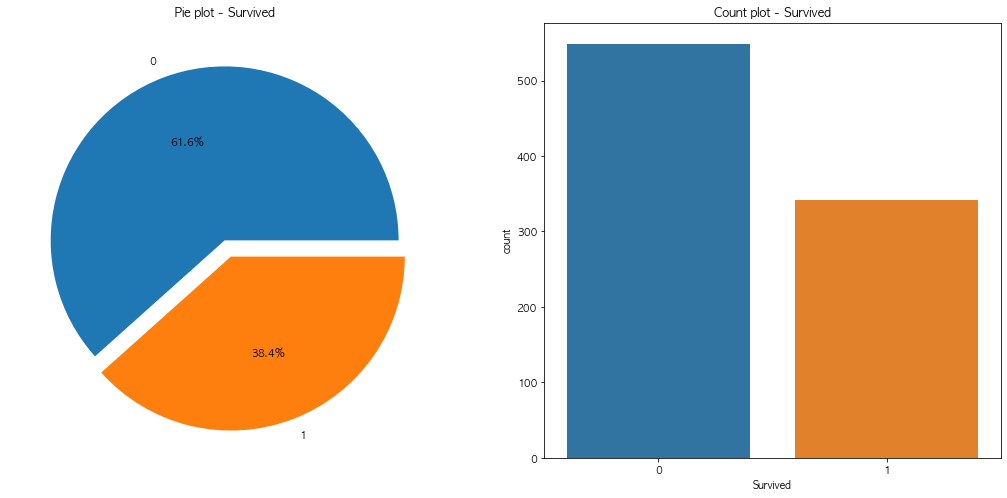

In [6]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_raw['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct="%1.1f%%", ax=ax[0])
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_raw, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

🔸 생존자(38.4%)보다 사망자(61.6%)가 더 많은 것을 확인

## 3. 변수들의 결측 및 이상치 처리

**1) 범주형(문자) 변수 결측치 처리 : Embarked**

In [7]:
# Embarked 컬럼의 unique한 값 확인
df_raw['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [8]:
# Embarked의 최빈값 확인 : 'S'
# df_raw['Embarked'].mode()

# 보다 자세한 값 확인을 위해 value_counts() 사용
df_raw['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
# Embarked의 결측치 nan은 최빈값 'S'로 대체
df_raw['Embarked'].fillna("S", inplace=True)

**2) 범주형(문자) 변수 결측치 처리 : Cabin**

In [10]:
# null의 개수 파악
df_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

🔸 Cabin 의 결측치가 많고, 대체 값으로 어떤 값을 설정해야할 지 고민됨<br>
🔸 본 과제에서 알아내고자 하는 영향인자에 대해 Cabin의 값은 제외하고 진행함

## 4. 그래프 분석을 통해 변수간 관계를 확인

### Heatmap 이용해서 전체 상관 관계 확인

Text(0.5, 0.98, 'Correlation Heatmap of Numeric Features')

<Figure size 432x288 with 0 Axes>

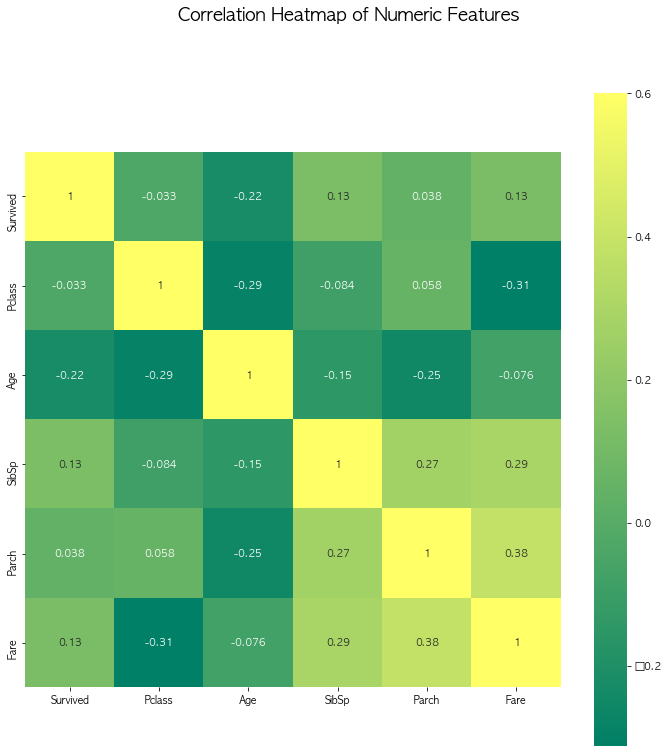

In [11]:
# passengerId 제외한 모든 컬럼과 Survived(Target value)와의 상관관계 heatmap화
fig = plt.figure()
flg,ax = plt.subplots(figsize=[12, 12])
df_corr = df_raw.drop('PassengerId', axis=1).dropna().corr()

sns.heatmap(df_corr, annot=True, square=True, vmax=0.6, cmap=plt.cm.summer)
plt.suptitle('Correlation Heatmap of Numeric Features', fontsize=18)

In [12]:
n = len(df_corr.columns)
df_corr.nlargest(n, columns='Survived')['Survived']

Survived    1.000000
SibSp       0.132599
Fare        0.128306
Parch       0.038081
Pclass     -0.033032
Age        -0.223089
Name: Survived, dtype: float64

🔸Survived와 높은 상관관계 : SibSp > Fare > Parch > Pclass > Age 순

### pairplot 이용해서 개별 변수간의 분포 확인

<Figure size 1440x1440 with 0 Axes>

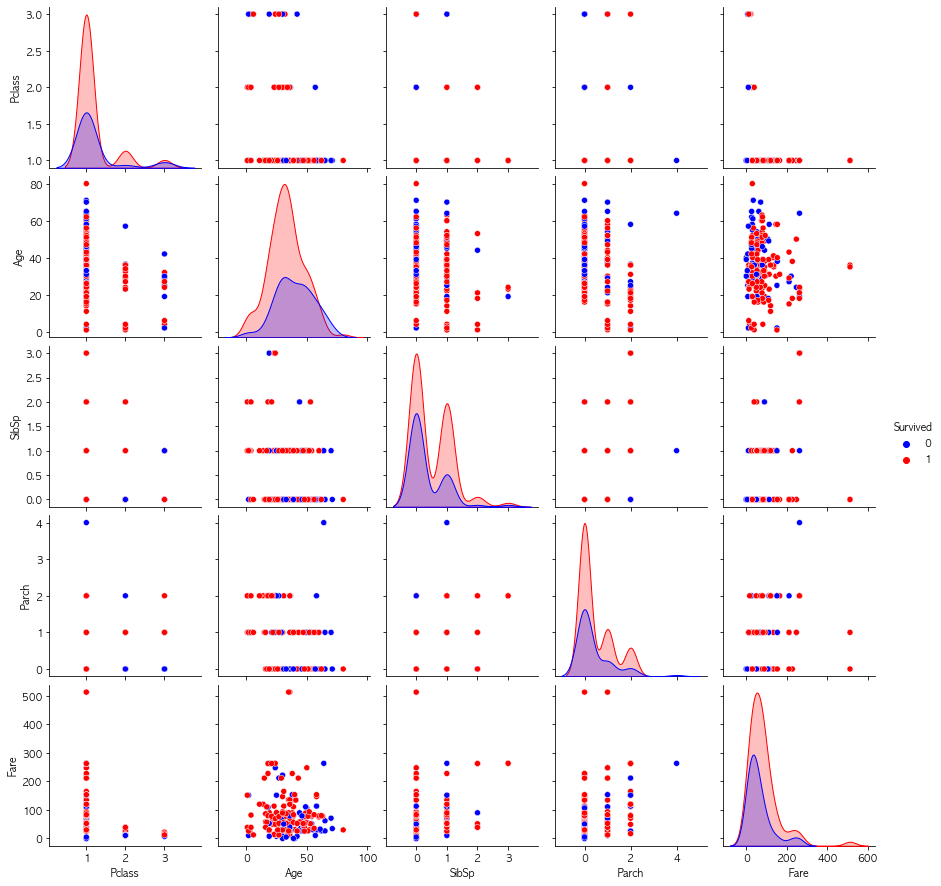

In [13]:
fig = plt.figure(figsize=[20, 20])
ax = sns.pairplot(df_raw.drop('PassengerId', axis=1).dropna(), palette={'red', 'blue'}, hue='Survived')

### 가설 1 : 선실등급(pclass)은 생존에 영향을 주는 설명변수일 것이다.

In [14]:
# pclass에 따른 생존률의 차이 확인
df_raw[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


<AxesSubplot:xlabel='Pclass', ylabel='count'>

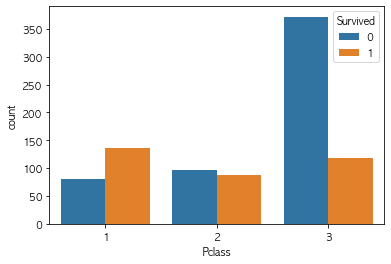

In [15]:
sns.countplot('Pclass', hue='Survived', data=df_raw)

🔸Pclass가 높을수록 생존율이 높은 것을 확인할 수 있음!

### 가설 2 : 성별(Sex)는 생존에 영향을 주는 설명변수일 것이다.

<AxesSubplot:xlabel='Sex', ylabel='count'>

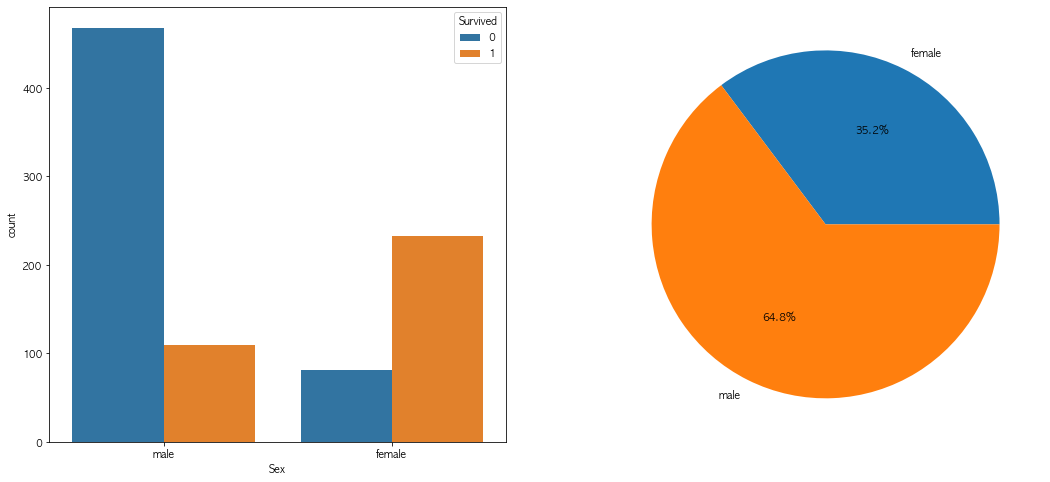

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

th2 = df_raw.groupby(['Sex']).size()
th2.plot.pie(y="Survived", autopct="%.1f%%", ax=ax[1])
plt.ylabel("")

sns.countplot('Sex', hue='Survived', data=df_raw, ax=ax[0])

🔸남성보다는 여성의 생존율이 높은 것을 확인할 수 있음<br>
🔸여성의 생존율(64.8%), 남성의 생존율(35.2%)

### 가설 3 : 나이(Age)는 생존에 영향을 주는 설명변수일 것이다.

In [17]:
# passenger 나이 살펴보기
print('oldest : {:.1f} Years'.format(df_raw['Age'].max()))
print('youngest : {:.1f} Years'.format(df_raw['Age'].min()))
print('Average Age of Passenger : {:.1f} Years'.format(df_raw['Age'].mean()))

oldest : 80.0 Years
youngest : 0.4 Years
Average Age of Passenger : 29.8 Years


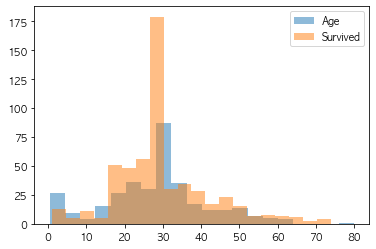

In [18]:
plt.hist(df_raw[df_raw['Survived'] == 1]['Age'], bins=20, label='생존', alpha=0.5)
plt.hist(df_raw[df_raw['Survived'] == 0]['Age'], bins=20, label='사망', alpha=0.5)
plt.legend(['Age', 'Survived'])

🔸젊은 연령대에서 생존하는 비율이 높게 나타남

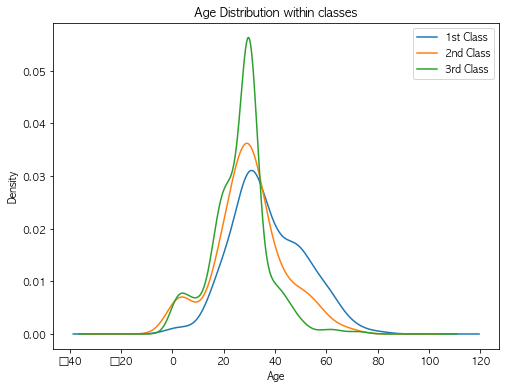

In [19]:
#class에 따른 나이 분포
plt.figure(figsize=(8, 6))
df_raw['Age'][df_raw['Pclass'] == 1].plot(kind='kde')
df_raw['Age'][df_raw['Pclass'] == 2].plot(kind='kde')
df_raw['Age'][df_raw['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

🔸class에 따른 나이 분포를 보면, 높은 class일수록 나이 많은 사람의 수가 많아짐을 알 수 있음<br>

### 가설 4 : 승선장소(Embarked)은 생존에 영향을 주는 설명변수일 것이다.

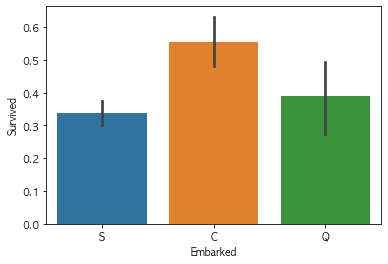

In [20]:
th4 = sns.barplot(x='Embarked',y='Survived', data=df_raw)

🔸약간의 차이는 있지만, 생존율은 비슷한 편이며 승선장소가 C인 승객의 생존율이 조금 더 높은 편임<br>

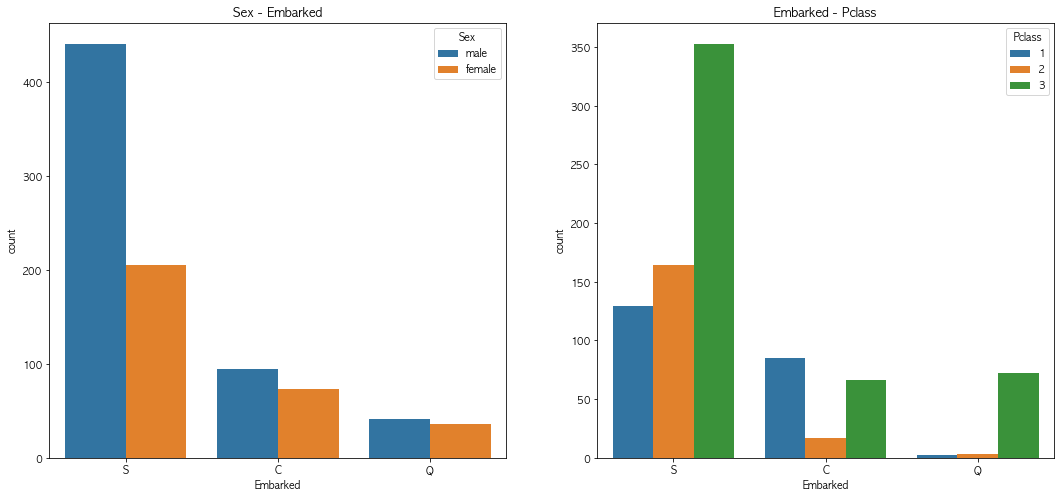

In [21]:
f,ax=plt.subplots(1, 2, figsize=(18, 8))

sns.countplot('Embarked', hue='Sex', data=df_raw, ax=ax[0])
ax[0].set_title('Sex - Embarked')

sns.countplot('Embarked', hue='Pclass', data=df_raw, ax=ax[1])
ax[1].set_title('Embarked - Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

🔸C와 Q는 남녀의 비율이 비슷하고, S는 남자가 조금 더 많음 <br>
🔸생존율이 가장 높은 C를 보면 비교적 1st class인 사람이 많음<br>
🔸생존율이 비교적 낮은 S를 보면 3rd class인 사람이 매우 높은 비율을 차지하는 것을 확인할 수 있음

### 가설 5 : 티켓 가격(Ticket)는 생존에 영향을 주는 설명변수일 것이다.

In [27]:
surv = df_raw[df_raw.Survived == 1]
nosurv = df_raw[df_raw.Survived == 0]

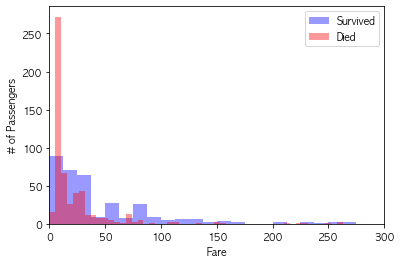

In [28]:
th5 = sns.distplot(surv.Fare,kde=False,color='blue',label='Survived')
th5 = sns.distplot(nosurv.Fare,kde=False,color='red',label='Died')
th5.set_ylabel('# of Passengers')
plt.xlim(0, 300)
th5.legend()

🔸위의 가설 1에서 class가 높을수록 생존율이 높은 것을 확인!<br>
🔸class가 높을수록 ticket 가격이 높아지는 것이 일반적이지만, 가설 5의 그래프에서는 낮은 가격대의 ticket에 생존한 승객이 밀집되어 있음. <br>
🔸동시에, 모든 가격대를 통틀어 가장 낮은 가격에서 사망율이 가장 높은 것을 확인할 수 있다. <br>

### 가설 6 : 함께탑승수(SibSp)은 생존에 영향을 주는 설명변수일 것이다.

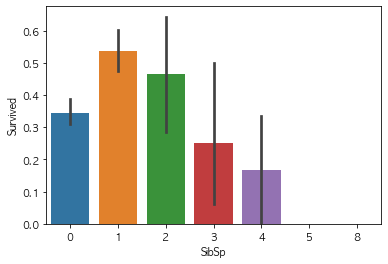

In [29]:
th6 = sns.barplot(x='SibSp',y='Survived',data=df_raw)

🔸일반적으로 배우자는 1명이므로, 배우자와 함께 탑승한 승객은 생존율이 높음 <br>
🔸3명 이상의 형제자매와 탑승한 승객의 생존율은 급격히 감소함 <br>

### 가설 7 : 함께탑승수(Parch)은 생존에 영향을 주는 설명변수일 것이다.

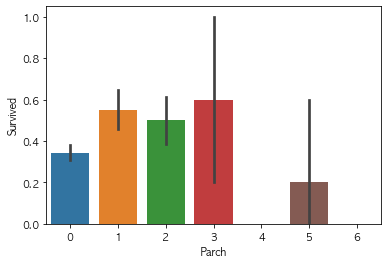

In [30]:
th7 = sns.barplot(x='Parch',y='Survived',data=df_raw)

🔸0명~3명의 부모 또는 자녀와 탑승한 승객의 생존율은 크게 차이나지 않음<br>
🔸4명 이상의 가족과 탑승한 승객의 생존율은 낮은 편임<br>

In [31]:
# 함께 탑승수(SibSp + Parch) 함께 살펴보기..
df_raw['FamilySize'] = df_raw['SibSp'] + df_raw['Parch'] + 1 
print("Maximum size of Family: ", df_raw['FamilySize'].max())
print("Minimum size of Family: ", df_raw['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


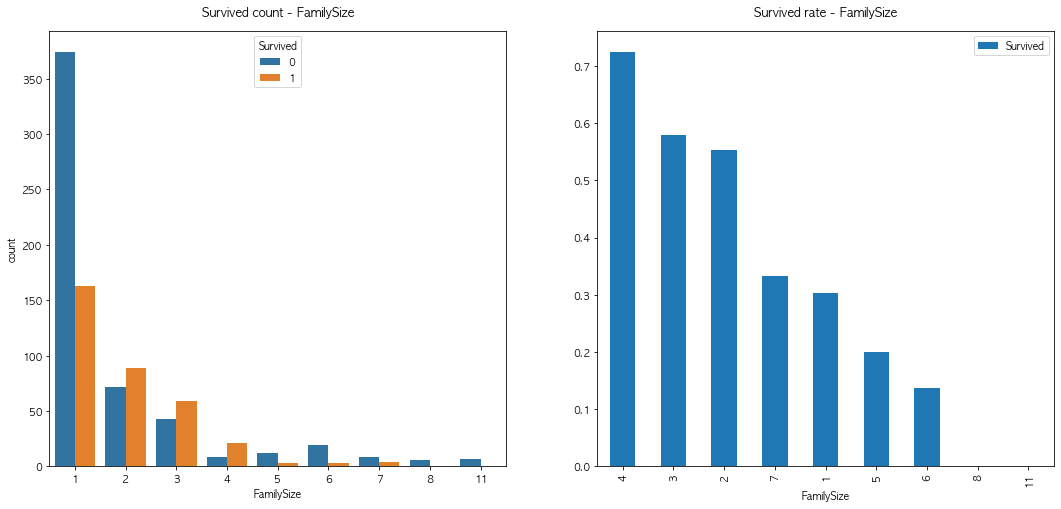

In [32]:
# 함께 탑승수(SibSp + Parch) 모두고려
f,ax=plt.subplots(1, 2, figsize=(18,8))

sns.countplot('FamilySize', hue='Survived', data=df_raw, ax=ax[0])
ax[0].set_title('Survived count - FamilySize',  y=1.02)

df_raw[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[1])
ax[1].set_title('Survived rate - FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

🔸SibSp + Parch를 함께 보면 해석이 조금 달라짐 <br>
🔸가족이 4명인 경우, 가장 생존확률이 높음 <br>
🔸가족의 수가 적거나(1명), 가족의 수가 5명 이상으로 늘어나는 경우 생존확률이 적음<br>

## 5. 생존에 영향을 미치는 잠재 인자 도출

- 가설 1 : 선실등급은 생존에 영향을 주는 설명변수이다.
- 가설 2 : 성별은 생존에 영향을 주는 설명변수이다.
- 가설 3 : 나이는 생존에 영향을 주는 설명변수이다.
- 가설 4 : 승선장소는 생존에 영향을 주는 설명변수이다.
- 가설 5 : 티켓 가격은 생존에 영향을 주는 설명변수일 것이다. <br>
  다만, 그래프 모양이 특이(매우 비대칭인 편)하므로 좀 더 두고 볼 필요가 있어 보인다.
- 가설 6 : 합께탑승수(형제,배우자)는 생존에 영향을 주는 설명변수이다.
- 가설 7 : 함께탑승수(자녀,부모)는 생존에 영향을 주는 설명변수이다.